In [1]:
library(Matrix)
library(edgeR)
library(dplyr)
library(Seurat)
library(biomaRt)
library(reshape)
library(ggplot2)
library(fgsea)

Loading required package: limma


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘reshape’


The following object is masked from ‘package:dplyr’:

    rename


The following object is masked from ‘package:Matrix’:

    expand


Loading required package: Rcpp





***HSC priming - plotting***



In [4]:
#Import summary scores - 
#DEGs are calculated between the three committed HSC lineages - myeloid, erythroid and MK and then those with adjusted 
#p value <0.05 used to form a signature to probe for enrichment in the uncommitted clusters (CD38neg and CD38 pos) - all in python
#these scores are them imported for plotting in to R

setwd('/home/jovyan/data/covid/HSC_data/')
values<-read.csv('summary_scores.csv', row.names = 1)

In [56]:
test<-values %>% filter(temp == "Uncommitted") %>% 
group_by(Status_on_day_collection_summary) %>%
summarise(erythroid_mean = mean(erythroid_score), MK_mean = mean(MK_score), myeloid_mean = mean(myeloid_score))

`summarise()` ungrouping output (override with `.groups` argument)



In [57]:
keep <-c("Healthy", "Asymptomatic", "Mild", "Moderate", "Severe", "Critical")
test<-filter(test, Status_on_day_collection_summary %in% keep)

In [58]:
test$Status_on_day_collection_summary <- factor(test$Status_on_day_collection_summary, 
                                                  levels = c("Healthy", "Asymptomatic", "Mild", "Moderate", 
                                                             "Severe", "Critical"))

In [59]:
test$erythroid_standard<-test$erythroid_mean / test$erythroid_mean[[3]]
test$myeloid_standard<-test$myeloid_mean / test$myeloid_mean[[3]]
test$MK_standard<-test$MK_mean / test$MK_mean[[3]]

In [60]:
setwd('/home/jovyan/data/covid/HSC_data/figures')

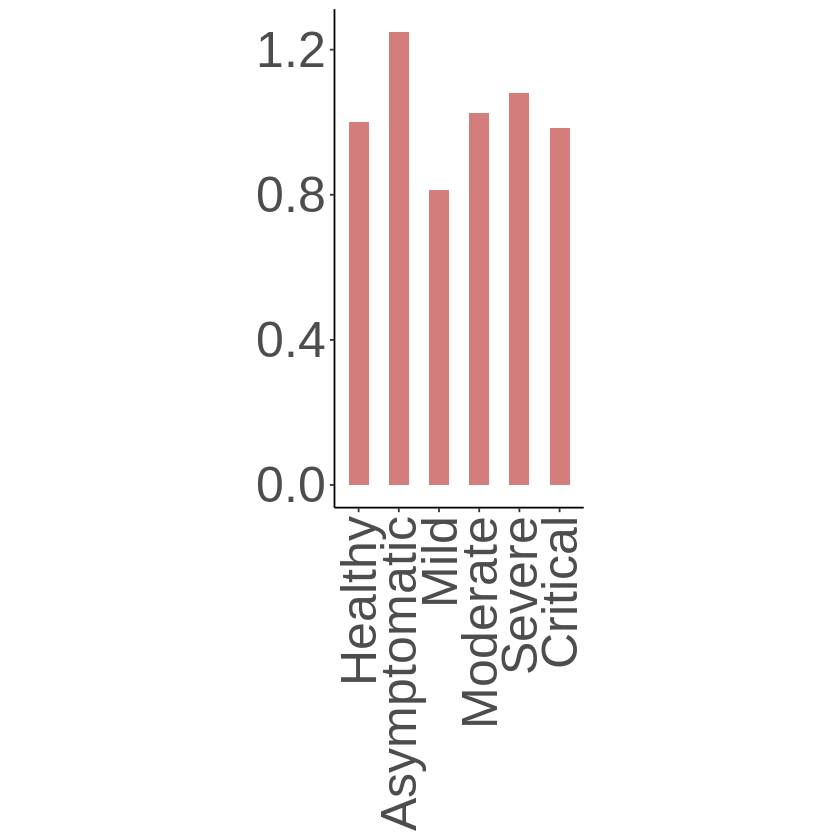

In [61]:
ggplot(data = test, aes(x = Status_on_day_collection_summary, y = erythroid_standard)) +
geom_bar(stat="identity", fill = "#d37d7d", width = 0.5, position=position_dodge())+
  scale_fill_brewer(palette="Paired")+ theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+
 theme(axis.title.x=element_blank(), axis.title.y=element_blank(),
      axis.text.x = element_text(angle = 90, size = 30, vjust = 0.5, hjust=1),
      axis.text.y = element_text(size = 30))+
theme(aspect.ratio = 2/1)

ggsave("erythroid_enrichment_CD38pos.pdf", width = 10, height = 10)

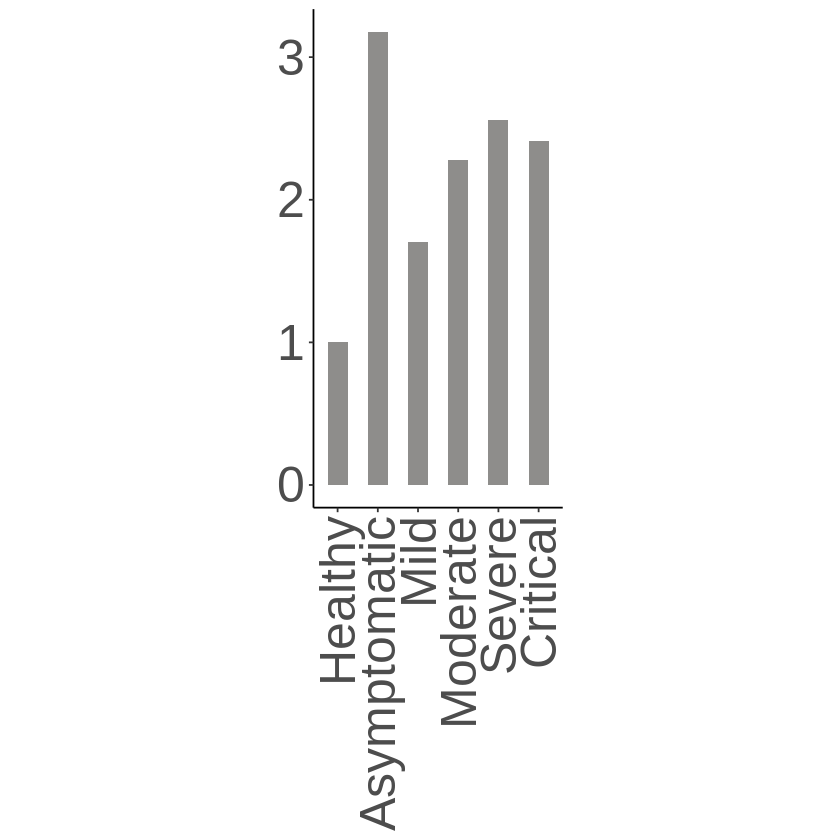

In [62]:
ggplot(data = test, aes(x = Status_on_day_collection_summary, y = MK_standard)) +
geom_bar(stat="identity", fill = "#8e8d8b", width = 0.5, position=position_dodge())+
  scale_fill_brewer(palette="Paired")+ theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+
 theme(axis.title.x=element_blank(), axis.title.y=element_blank(),
      axis.text.x = element_text(angle = 90, size = 30, vjust = 0.5, hjust=1),
      axis.text.y = element_text(size = 30))+
theme(aspect.ratio = 2/1)

ggsave("MK_enrichment_CD38pos.pdf", width = 10, height = 10)

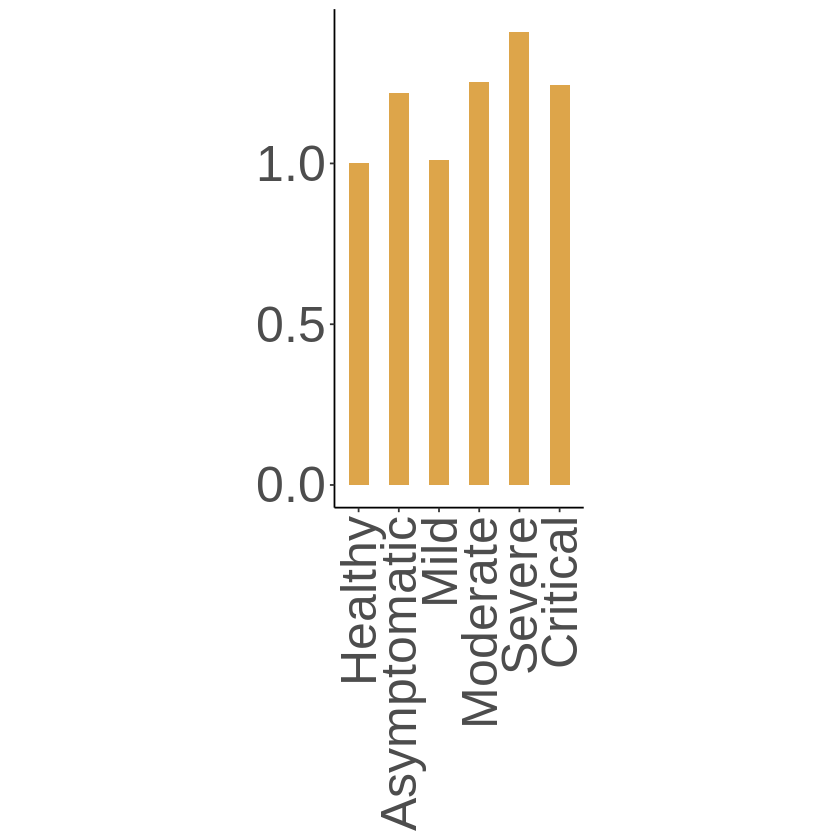

In [63]:
ggplot(data = test, aes(x = Status_on_day_collection_summary, y = myeloid_standard)) +
geom_bar(stat="identity", fill = "#dda54a", width = 0.5, position=position_dodge())+
  scale_fill_brewer(palette="Paired")+ theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+
 theme(axis.title.x=element_blank(), axis.title.y=element_blank(),
      axis.text.x = element_text(angle = 90, size = 30, vjust = 0.5, hjust=1),
      axis.text.y = element_text(size = 30))+
theme(aspect.ratio = 2/1)

ggsave("myeloid_enrichment_CD38pos.pdf", width = 10, height = 10)